[landmark {
  x: 0.6174295544624329
  y: 0.6597105860710144
  z: -0.05639076605439186
}
landmark {
  x: 0.6152846813201904
  y: 0.5772385001182556
  z: -0.11015531420707703
}
landmark {
  x: 0.6175054907798767
  y: 0.5984013676643372
  z: -0.05656486377120018
}
landmark {
  x: 0.5986939072608948
  y: 0.4914340078830719
  z: -0.08327776193618774
}
landmark {
  x: 0.6152141690254211
  y: 0.5522788166999817
  z: -0.11771948635578156
}
landmark {
  x: 0.6159008145332336
  y: 0.5176021456718445
  z: -0.11007662862539291
}
landmark {
  x: 0.6186597943305969
  y: 0.4323321580886841
  z: -0.05650376155972481
}
landmark {
  x: 0.47255051136016846
  y: 0.42163795232772827
  z: 0.033842168748378754
}
landmark {
  x: 0.6193510890007019
  y: 0.3789110779762268
  z: -0.04312562942504883
}
landmark {
  x: 0.6195037961006165
  y: 0.3475611209869385
  z: -0.04707442596554756
}
landmark {
  x: 0.6222796440124512
  y: 0.21858277916908264
  z: -0.02282690443098545
}
landmark {
  x: 0.6174418330192566
  y:

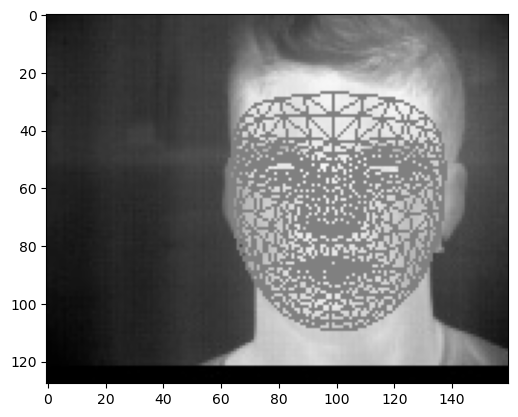

In [3]:
# IMPORTING LIBRARIES
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt

# INITIALIZING OBJECTS
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)


# DETECT THE FACE LANDMARKS
with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:

    image = cv2.imread("C:\\Users\\jaden\\OneDrive\\Documents\\GitHub\\ScienceFair_AI_Models_2023\\jpgTrainingData23\\DrunkI\\18_dionisis_4_f_M_18_80.jpg")
    
    # Detect the face landmarks
    results = face_mesh.process(image)

    # To improve performance
    image.flags.writeable = True

    # Convert back to the BGR color space
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    # Draw the face mesh annotations on the image.
    if results.multi_face_landmarks:
      print(results.multi_face_landmarks)
      print(type(results.multi_face_landmarks))
      print(len(results.multi_face_landmarks))
      print(type(results.multi_face_landmarks[0]))
      ##print(len(results.multi_face_landmarks[0]))
      counter = 0
      for data_point in results.multi_face_landmarks[0].landmark:
        counter +=1
      print(counter)
      for face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())

    # Display the image
    plt.imshow(image)
    plt.show()

In [9]:
import os
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(468*3), n_channels=1,
                 n_classes=1, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = os.listdir("C:\\Users\\jaden\\OneDrive\\Documents\\GitHub\\ScienceFair_AI_Models_2023\\jpgTrainingData2\\Train\\Sober")
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        print(list_IDs_temp)
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

NameError: name 'keras' is not defined

In [5]:
#@title Run this to download the data and setup our environment
import cv2
import dlib
import gdown
import pickle
import warnings
import itertools

import numpy as np
import pandas as pd
import seaborn as sns

import urllib.request

from sklearn import metrics


from scipy.spatial import distance
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

###Getting the csv data loaded

###Getting the Dlib Shape predictor!
##!wget -O ./shape_predictor_68_face_landmarks.dat
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [6]:
#@title Run this code to setup the extraction of Facial Landmarks

# Load's dlib's pretrained face detector model
#frontalface_detector = dlib.get_frontal_face_detector()


#Load the 68 face Landmark file
predictor = dlib.shape_predictor('./shape_predictor_68_face_landmarks.dat')
"""
Returns facial landmarks for the given input image path
"""
def get_landmarks(image):
  
  
  #:type image : cv2 object
  #:rtype landmarks : list of tuples where each tuple represents 
  #                  the x and y co-ordinates of facial keypoints
  
  #Bounding Box co-ordinates around the face(Training data is 48*48(cropped faces))
  rects = [dlib.rectangle(left=1, top=1, right=160, bottom=128)]

  #Read Image using OpenCV
  #image = cv2.imread(image_path)
  #Detect the Faces within the image
  landmarks = [(p.x, p.y) for p in predictor(image, rects[0]).parts()]
  return image,landmarks

"""
Display image with its Facial Landmarks
"""
def plot_image_landmarks(image,face_landmarks):
  """
  :type image_path : str
  :type face_landmarks : list of tuples where each tuple represents 
                     the x and y co-ordinates of facial keypoints
  :rtype : None
  """
  radius = -2
  circle_thickness = 1
  image_copy = image.copy()
  for (x, y) in face_landmarks:
    cv2.circle(image_copy, (x, y), circle_thickness, (255,0,0), radius)
    
  plt.imshow(image_copy, interpolation='nearest', cmap='Greys_r')
  plt.xticks([]); plt.yticks([])
  plt.show()
  
 
'''
Converts pixels values to 2D-image. 
Displays the image and returns the cv2 image
object
'''
def get_pixels_image(img_pixels,plt_flag):
  """
  :type image_pixels : str
  :type plt_flag : boolean
  :rtype image : cv2 object
  """
  
  width = 48
  height = 48
  
  image = np.fromstring(img_pixels, dtype=np.uint8, sep=" ").reshape((height, width))
  
  if plt_flag:
      plt.imshow(image, interpolation='nearest', cmap="Greys_r")
      plt.xticks([]); plt.yticks([])
      plt.show()
      
      
  return image

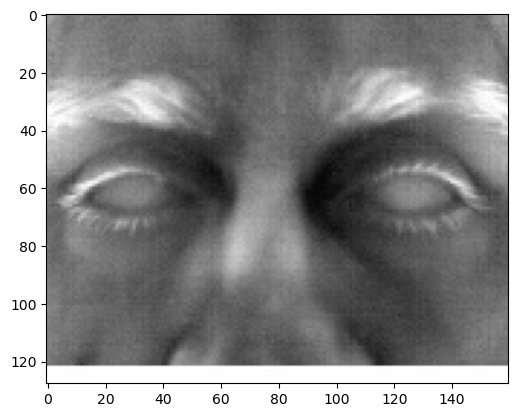

In [17]:
# convert pixels to 2D Images
image = cv2.imread("C:\\Users\\jaden\\OneDrive\\Documents\\GitHub\\ScienceFair_AI_Models_2023\\jpgTrainingData2\\Train\\Sober\\31_antonis_1_e_M_45_76.jpg")

plt.imshow(255 - image)

plt.show()

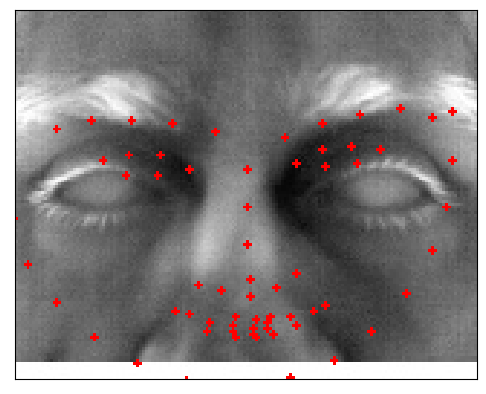

In [18]:
#Extract the Facial Landmarks
image,facial_landmarks = get_landmarks(255 - image)

#Display the Facial Landmarks on the Image
plot_image_landmarks(image,facial_landmarks)

In [19]:
#@title Instructor Solution
def get_all_landmarks_euclid_dist(face_landmarks):
  
    e_dist = []
    for i, j in itertools.combinations(range(68), 2):
      e_dist.append(distance.euclidean(face_landmarks[i], face_landmarks[j]))
    
    return e_dist

In [21]:
#@title Function that preprocesses the data to extract distances between all points

def preprocess_data(df):
  
  X = []
  Y = []
  X_pixels = []
  
  n_pixels = 2304
  
  for index, row in (df.iterrows()):

      if index%1000 == 0:
        print (index, "Datapoints Processed")
        
      try:
          image = get_pixels_image(row['pixels'],0)
          X_pixels.append(image.ravel()) 
          image = cv2.GaussianBlur(image,(5,5),0)
         
          _,face_landmarks = get_landmarks(image)
          X.append(get_all_landmarks_euclid_dist(face_landmarks)) # Using our feature function!
          Y.append(row['emotion'])

      except Exception as e:
          print ("An error occured:",e)

  #Save the data 
  np.save("pureX", X_pixels)
  np.save("dataX", X)
  np.save("dataY", Y)
  
  return np.array(X_pixels),np.array(X),np.array(Y) 

In [24]:
# set to True if we want to preload data -- which has already been generated for us :) 
preload = True 

if preload: 

  # load outputs saved in this folder after running preprocess_data() 
  dataX
  dataY
  
else: 
  
  # this takes 15-20 minutes to run, but someone has already run it and saved the ouputs in this folder
  pureX, dataX, dataY = preprocess_data(df)

In [26]:
#Split Data into Train, Test (90-10)
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.1, random_state=42,stratify =dataY)

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.493

In [31]:
####Standardize the data####################
###Note: Do not use test data to fit your Standardscaler Model
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_train.shape

(18000, 2278)

In [34]:
#Reduces features by maintaining 95% variance of the data
#After doing PCA on our training data, 2278 Dimensions --->reduced to 20
#Note: PCA is trained only on training data 
pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test= pca.transform(X_test)

In [36]:
X_train.shape

(18000, 9)

In [38]:
#@title How will our model operate? { display-mode: "form" }

#@markdown What are our inputs? 
inputs = "distances between facial landmarks" #@param ["images", "facial landmarks", "distances between facial landmarks", "Fill Me In"]

#@markdown What are our outputs? 
outputs = "integer encoded emotions" #@param ["integer encoded emotions", "images", "image edges", "Fill Me In"]

#@markdown What kind of problem will our AI model solve? 
problem_type  = "classification" #@param ["classification", "regression","Fill Me In"]


if inputs == "distances between facial landmarks":
  print("Yes, our inputs are our distance between facial landmarks!")
else:
  print('Not quite our inputs.')

if outputs == "integer encoded emotions":
  print("Yes, our outputs are integer encoded emotions!")
else:
  print('Not quite our outputs.')
  
if problem_type == "classification":
  print("We are trying to predict labels, therefore this is classification!")
else:
  print('Not quite our problem!')

Yes, our inputs are our distance between facial landmarks!
Yes, our outputs are integer encoded emotions!
We are trying to predict labels, therefore this is classification!


In [40]:
#@title Instructor Solution for Previous Two Code Cells { display-mode: "form" }
# student code may look something like...

#######Train the model##################
knn = KNeighborsClassifier(n_neighbors=10)
print ("Training the knn model")
knn.fit(X_train, y_train)

#######Evaluate the model##################
# they might use accuracy_score
#This cell will take longer to run(5-10mins)!
print ("Predict for KNN Model")
y_predknn = knn.predict(X_test)
print ("Prediction Completed")
print ("Test Accuracy(KNN):",metrics.accuracy_score(y_test, y_predknn))

#-----------------DecisionTreeClassifier--------------#
#######Train the model##################
dt = DecisionTreeClassifier(max_depth=20)
print ("Training the Decision Tree model")
dt.fit(X_train, y_train)
print ("Completed Decision Tree Training")

#######Evaluate the model##################

print ("Predict for Decision Tree Model")
y_preddt = dt.predict(X_test)
print ("Test Accuracy(DT):",metrics.accuracy_score(y_test, y_preddt))


#-----------------Logistic Regression--------------#
#######Train the model##################
lr = LogisticRegression(solver='lbfgs',multi_class='multinomial')
print ("Training the Logistic Regression model")
lr.fit(X_train, y_train)
print ("Completed LR Training")

#######Evaluate the model##################
# they might use accuracy_score
#This cell will take longer to run(5-10mins)!
print ("Predict for LR Model")
y_predlr = lr.predict(X_test)
print ("Test Accuracy(LR):",metrics.accuracy_score(y_test, y_predlr))

Training the knn model
Predict for KNN Model
Prediction Completed
Test Accuracy(KNN): 0.462
Training the Decision Tree model
Completed Decision Tree Training
Predict for Decision Tree Model
Test Accuracy(DT): 0.411
Training the Logistic Regression model
Completed LR Training
Predict for LR Model
Test Accuracy(LR): 0.4575


In [42]:
'''
Plots the confusion Matrix and saves it
Pass the true labels and the predicted labels
'''
def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = list(label_map.values())
  df_cm = pd.DataFrame(cm,index = labels,columns = labels)
  fig = plt.figure()
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5,3.5,4.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()

Plotting the Confusion Matrix


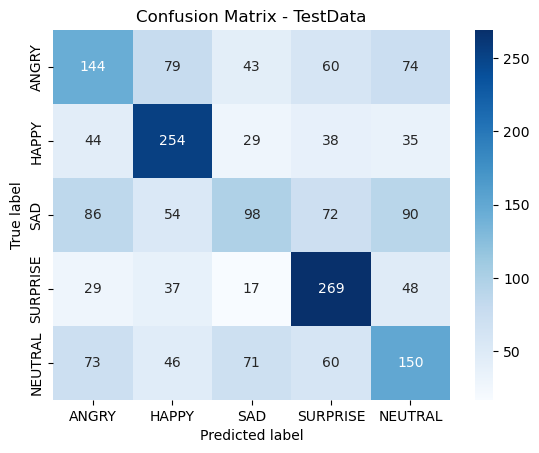

In [44]:
plot_confusion_matrix(y_test,y_predlr)

In [46]:
#@title Take a look at your confusion Matrix and answer the following questions

#@markdown Name most correctly classified emotion? 
correct_emotion = "Surprise"#@param ["Anger","Happy","Sad","Surprise", "Neutral", "Fill Me In"] 

#@markdown Name most incorrectly classified emotion? 
incorrect_emotion = "Sad"#@param ["Anger","Happy","Sad","Surprise", "Neutral", "Fill Me In"] 

#@markdown Sad Emotion is highly misclassified as?
sad_misclassify ="Neutral"#@param ["Anger","Happy","Sad","Surprise", "Neutral", "Fill Me In"] 

#@markdown Neutral Emotion is highly misclassified as?
neutral_misclassify ="Sad"#@param ["Anger","Happy","Sad","Surprise", "Neutral", "Fill Me In"] 


#@markdown Angry Emotion is highly misclassified as?
angry_misclassify ="Neutral"#@param ["Anger","Happy","Sad","Surprise", "Neutral", "Fill Me In"] 



In [48]:
#Load the true pixel data and corresponding labels
X
Y

array([0, 4, 4, ..., 0, 2, 0], dtype=int64)

In [53]:
#@title Instructor Solution
#Split Data into Train, Test (90-10)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42,stratify =Y)


#Standardize the Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#PCA #Returns 264 features out of 2304
pca = PCA(.95)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test= pca.transform(X_test)


# student code may look something like...

#######Train the model##################
knn = KNeighborsClassifier(n_neighbors=10)
print ("Training the knn model")
knn.fit(X_train, y_train)

#######Evaluate the model##################
# they might use accuracy_score
#This cell will take longer to run(5-10mins)!
print ("Predict for KNN Model")
y_predknn = knn.predict(X_test)
print ("Prediction Completed")
print ("Test Accuracy(KNN):",metrics.accuracy_score(y_test, y_predknn))



#-----------------DecisionTreeClassifier--------------#
#######Train the model##################
dt = DecisionTreeClassifier(max_depth=20)
print ("Training the Decision Tree model")
dt.fit(X_train, y_train)
print ("Completed Decision Tree Training")

#######Evaluate the model##################

print ("Predict for Decision Tree Model")
y_preddt = dt.predict(X_test)
print ("Test Accuracy(DT):",metrics.accuracy_score(y_test, y_preddt))


#-----------------Logistic Regression--------------#
#######Train the model##################
lr = LogisticRegression(solver='lbfgs',multi_class='multinomial')
print ("Training the Logistic Regression model")
lr.fit(X_train, y_train)
print ("Completed LR Training")

#######Evaluate the model##################
# they might use accuracy_score
#This cell will take longer to run(5-10mins)!
print ("Predict for LR Model")
y_predlr = lr.predict(X_test)
print ("Test Accuracy(LR):",metrics.accuracy_score(y_test, y_predlr))

Training the knn model
Predict for KNN Model
Prediction Completed
Test Accuracy(KNN): 0.3545
Training the Decision Tree model
Completed Decision Tree Training
Predict for Decision Tree Model
Test Accuracy(DT): 0.3155
Training the Logistic Regression model
Completed LR Training
Predict for LR Model
Test Accuracy(LR): 0.404


In [55]:
from joblib import dump
dump(dt, "emo-detection-model.joblib") 

['emo-detection-model.joblib']

In [57]:
# extract images as vectors, convert from strings to ints -- this is called a "list comprehension" 
x_image = np.array( [np.fromstring(df['pixels'][i], dtype=np.uint8, sep=" ") for i in range(len(df))] ) 

# extract labels in the same way--through a list comprehension
y_image = np.array( [df['emotion'][i] for i in range(len(df)) ])

# generate train-test (90/10) splits
X_train, X_test, y_train, y_test = train_test_split(x_image, y_image, test_size=0.1,random_state=42)

# define the model
knn = KNeighborsClassifier(n_neighbors=10)

# train 
print ("training knn model ...")
knn.fit(X_train, y_train)

# test
print ("Predict for KNN Model")
y_pred_knn = knn.predict(X_test)

# display results
print ("KNN Test Accuracy on raw image inputs:", metrics.accuracy_score(y_test, y_pred_knn))

training knn model ...
Predict for KNN Model
KNN Test Accuracy on raw image inputs: 0.359
